In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [227]:
data = pd.read_csv("~/Desktop/shootings.csv")

In [228]:
data = data.drop(["id"], axis=1)
data = data.drop_duplicates()
data.isnull().values.any()
data['date'] =  pd.to_datetime(data['date'], format='%Y-%m-%d')

In [229]:
pop_data = pd.read_csv("~/Desktop/census_data.csv")

In [230]:
pop_data[["Hispanic", "White", "Black", "Native", "Asian", "Poverty", "Unemployment"]] = pop_data[["Hispanic", "White", "Black", "Native", "Asian", "Poverty", "Unemployment"]].div(100).round(2)
pop_data = pop_data[["State", "TotalPop", "Men", "Women", "Hispanic", "White", "Black", "Native", "Asian", "Poverty", "Unemployment"]]
pop_data[["Hispanic", "White", "Black", "Native", "Asian", "Poverty", "Unemployment"]] = pop_data[["Hispanic", "White", "Black", "Native", "Asian", "Poverty", "Unemployment"]].multiply(pop_data["TotalPop"], axis="index").round()
pop_data = pop_data.groupby("State", as_index=False).sum()

In [231]:
state_code = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [232]:
pop_data['State'] = pop_data['State'].map(state_code)

In [233]:
pop_data.head(5)

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Poverty,Unemployment
0,AL,4850771,2350806,2499965,197476.0,3197968.0,1280794.0,20063.0,60619.0,880968.0,375632.0
1,AK,738565,386319,352246,50039.0,454361.0,22321.0,101705.0,44489.0,75214.0,60298.0
2,AZ,6809946,3385055,3424891,2104603.0,3785722.0,275947.0,264004.0,206584.0,1170256.0,503892.0
3,AR,2977944,1461651,1516293,213044.0,2174175.0,456313.0,14767.0,41044.0,546626.0,191499.0
4,CA,38982847,19366579,19616268,15104590.0,14775788.0,2155028.0,119422.0,5427452.0,5911743.0,3068458.0


In [234]:
pop_data["USA"] = "total"

In [235]:
pop_data1 = pop_data.groupby("USA", as_index=False).sum()

In [236]:
pop_data1

,USA,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Poverty,Unemployment
0,total,324473370,159672750,164800620,59926671.0,197295283.0,39396184.0,1951719.0,16924933.0,48920767.0,22372618.0


In [237]:
f_data = data[["gender", "race", "state", ]]
f_data.head(1)

,gender,race,state
0,M,Asian,WA


In [238]:
new_data = f_data.groupby("race", as_index=False).count()
new_data = new_data[["race", "state"]]
new_data = new_data.rename(columns={"state": "Number of Deaths"})

In [239]:
new_data["Population of each race"] = pop_data1.TotalPop
new_data["Hispanic"] = pop_data1.Hispanic
new_data["White"] = pop_data1.White
new_data["Black"] = pop_data1.Black
new_data["Native"] = pop_data1.Native
new_data["Asian"] = pop_data1.Asian
new_data["other"] = pop_data1.TotalPop - (pop_data1.Native + pop_data1.Hispanic + pop_data1.White + pop_data1.Black + pop_data1.Asian)

In [240]:
new_data.iloc[0,2] = new_data.iloc[0,7]
new_data.iloc[1,2] = new_data.iloc[0,5]
new_data.iloc[2,2] = new_data.iloc[0,3]
new_data.iloc[3,2] = new_data.iloc[0,6]
new_data.iloc[4,2] = new_data.iloc[0,-1]
new_data.iloc[5,2] = new_data.iloc[0,4]
new_data = new_data[["race", "Number of Deaths", "Population of each race"]]

In [241]:
new_data["percentage"] = new_data.iloc[:,1].divide(new_data["Population of each race"], axis="index")

In [242]:
new_data.iloc[:,3] = new_data.iloc[:,3] * 100

In [243]:
new_data

,race,Number of Deaths,Population of each race,percentage
0,Asian,93,16924933.0,0.000549
1,Black,1298,39396184.0,0.003295
2,Hispanic,902,59926671.0,0.001505
3,Native,78,1951719.0,0.003996
4,Other,48,8978580.0,0.000535
5,White,2476,197295283.0,0.001255


In [248]:
data2 = data.groupby("state")["name"].count().reset_index(name="count")

In [254]:
pop1 = pop_data[["State", "Unemployment"]]

In [259]:
merged = pd.merge(left = data2, right=pop1, left_on="state", right_on="State")
merged = merged[["state", "count", "Unemployment"]]
merged

,state,count,Unemployment
0,AK,36,60298.0
1,AL,95,375632.0
2,AR,73,191499.0
3,AZ,222,503892.0
4,CA,701,3068458.0
5,CO,168,291776.0
6,CT,20,264786.0
7,DE,10,60963.0
8,FL,324,1486143.0
9,GA,161,781241.0


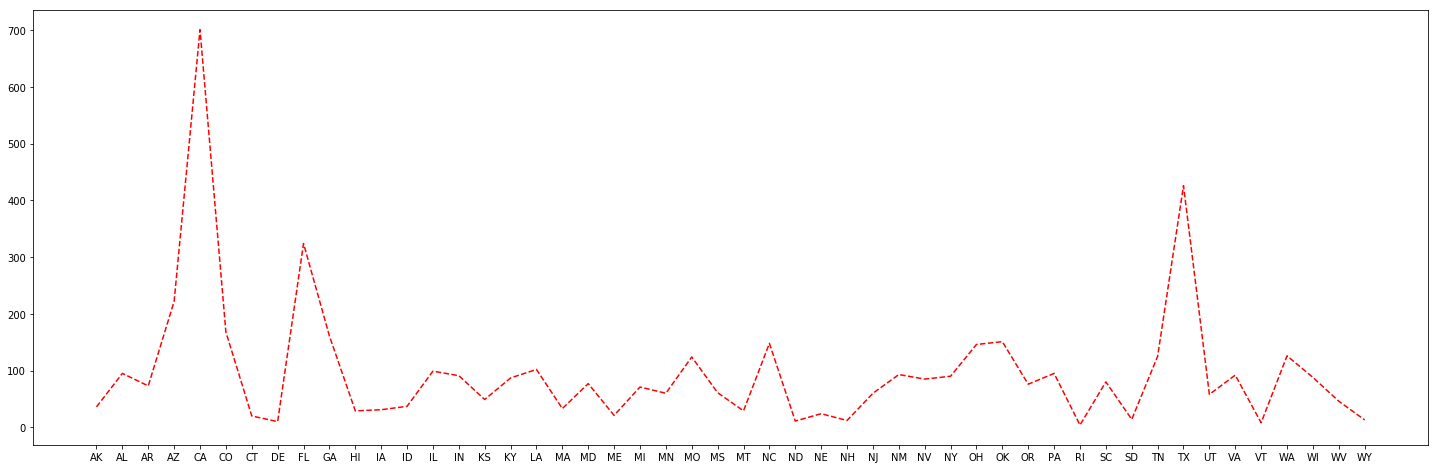

In [276]:
x = merged["state"]
y = merged["count"]
plt.figure(figsize=(25, 8))
plt.plot(x,y, "r--")
plt.show()

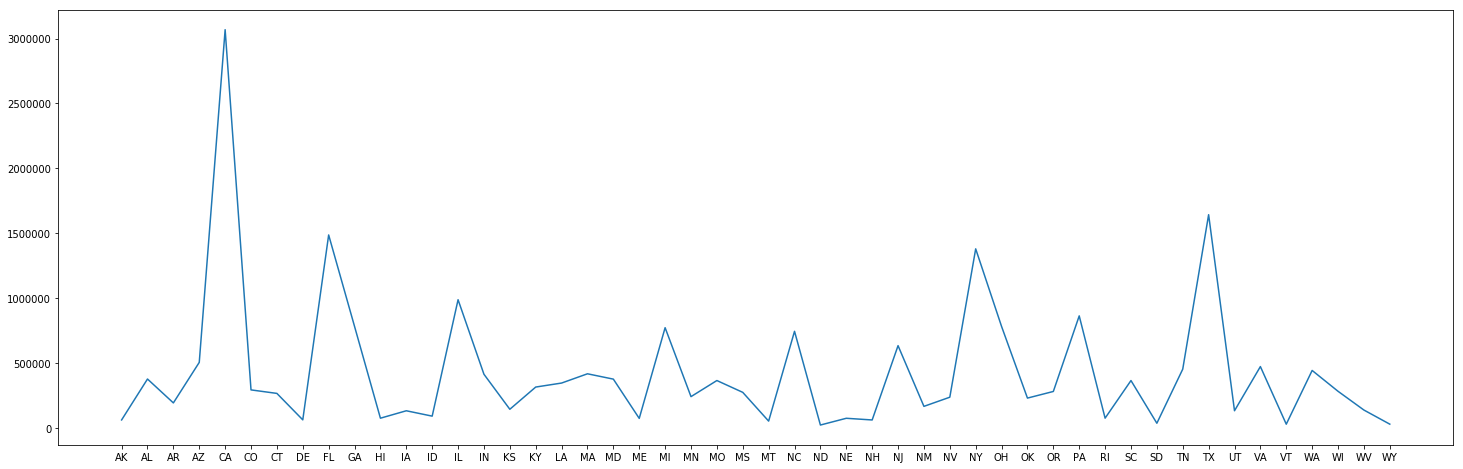

In [275]:
x = merged["state"]
y = merged["Unemployment"]
plt.figure(figsize=(25, 8))
plt.plot(x,y,)
plt.show()